In [1]:
% matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas
import PIL
import imagehash
import time

In [2]:
df_train = pandas.read_csv('./data/train.csv')

In [3]:
# Create a new column with the hash value for the image
img_hash = df_train.Image.apply(lambda x: imagehash.phash(PIL.Image.open('./data/train/'+x)))
df_train['Hash_val'] = img_hash

In [4]:
# Count the number of duplicate images
num_duplicates = (df_train.Hash_val.value_counts() > 1).sum()
print 'There are {:d} duplicate images'.format(num_duplicates)

There are 777 duplicate images


In [5]:
# Create a new column with the number of copies.
grouped = df_train.groupby('Hash_val',group_keys=False)
df_train['Copies'] = grouped.Hash_val.transform('count')

In [6]:
# Are the Ids for a given Hash value unique? 
grouped.Id.transform('unique')

0                  [w_e15442c]
1                  [w_1287fbc]
2                  [w_da2efe0]
3                  [w_19e5482]
4                  [w_f22f3e3]
5                  [w_8b1ca89]
6                  [w_eaad6a8]
7       [new_whale, w_aae82f8]
8                  [w_3d0bc7a]
9                  [w_50db782]
10                 [w_2863d51]
11                 [w_6dc7db6]
12                 [w_968f2ca]
13                 [w_fd1cb9d]
14                 [w_60759c2]
15                 [w_ab6bb0a]
16                 [w_79b42cd]
17                 [w_c9ba30c]
18                 [w_e6ec8ee]
19                 [new_whale]
20      [new_whale, w_bc93297]
21                 [w_7e5cc5e]
22                 [w_ab6db0f]
23                 [w_bc8d634]
24                 [w_b59c523]
25                 [w_2850471]
26                 [new_whale]
27                 [w_51969d2]
28                 [w_4be8a3e]
29                 [w_c0cfd5b]
                 ...          
9820    [w_17ee910, new_whale]
9821    

In [7]:
# Find Images which have the same hash value but different Ids
# In most cases the other label is new_whale
same_hash_diff_labels = grouped.Id.transform('unique').apply(len) > 1
grouped.Id.transform('unique')[same_hash_diff_labels].value_counts()

[new_whale, w_cae7677]    3
[w_88f57d0, new_whale]    2
[new_whale, w_7133c9d]    2
[w_fca13e2, new_whale]    2
[new_whale, w_ea2385d]    2
[w_dd60c18, new_whale]    2
[new_whale, w_aae82f8]    2
[new_whale, w_ee17a08]    2
[new_whale, w_8c9ed42]    2
[w_e63fbbe, new_whale]    2
[new_whale, w_2ef900c]    2
[new_whale, w_62c3998]    2
[w_845f7ca, new_whale]    2
[new_whale, w_c0d494d]    2
[w_6163581, new_whale]    2
[new_whale, w_964c1b3]    2
[new_whale, w_d398969]    2
[new_whale, w_2f6e76c]    2
[new_whale, w_71e6583]    2
[new_whale, w_d36f58c]    2
[new_whale, w_09e0cbf]    2
[w_41ed8e8, new_whale]    2
[w_5c07f42, new_whale]    2
[new_whale, w_3745f59]    2
[new_whale, w_a06bdc4]    2
[w_17a2610, new_whale]    2
[new_whale, w_83df8d5]    2
[w_f5771d1, w_1000f90]    2
[w_c0d494d, new_whale]    2
[new_whale, w_91a96d8]    2
                         ..
[new_whale, w_d62128e]    2
[new_whale, w_f8e6546]    2
[w_5436d75, new_whale]    2
[new_whale, w_53859b2]    2
[new_whale, w_1a7068

In [8]:
# Find those cases for which the other label is not new_whale
contains_new_whale = grouped.Id.transform('unique').apply(lambda x: 'new_whale' in x)
unclear_pairs = grouped.Id.transform('unique')[same_hash_diff_labels & ~contains_new_whale]
print 'There are {:d} images for which the correct label is unclear'.format(len(unclear_pairs))
print 'They are:'
unclear_pairs.value_counts()

There are 20 images for which the correct label is unclear
They are:


[w_90201e3, w_f843c4d]    2
[w_da6d50b, w_b7d5069]    2
[w_cd88a48, w_d428980]    2
[w_7028d77, w_f6bca7a]    2
[w_5570053, w_dbd2cff]    2
[w_b6efe77, w_741861e]    2
[w_a67a1bc, w_e8a9fb8]    2
[w_cc22f68, w_80bae3a]    2
[w_f5771d1, w_1000f90]    2
[w_f660d7d, w_6af9dd7]    2
Name: Id, dtype: int64

In [9]:
# Check how many times the images for which the label is not clear appear
# Change the first index below from 0 to 9 to go through all images
df_train[df_train.Id == unclear_pairs.value_counts().keys()[9][0]]

,Image,Id,Hash_val,Copies
3289,55a53eac.jpg,w_f660d7d,bcc8da93b6b4942c,2
5125,8530258e.jpg,w_f660d7d,9fc2e03d1fc2b03c,1
7035,b6d930d7.jpg,w_f660d7d,8bd0f52f5a07e039,1


In [10]:
unclear_pairs

492     [w_7028d77, w_f6bca7a]
1646    [w_cd88a48, w_d428980]
1715    [w_7028d77, w_f6bca7a]
1870    [w_f5771d1, w_1000f90]
1964    [w_cc22f68, w_80bae3a]
2445    [w_a67a1bc, w_e8a9fb8]
2792    [w_90201e3, w_f843c4d]
3038    [w_5570053, w_dbd2cff]
3289    [w_f660d7d, w_6af9dd7]
3347    [w_cd88a48, w_d428980]
4339    [w_f660d7d, w_6af9dd7]
4529    [w_f5771d1, w_1000f90]
5011    [w_a67a1bc, w_e8a9fb8]
5046    [w_b6efe77, w_741861e]
5161    [w_5570053, w_dbd2cff]
5925    [w_90201e3, w_f843c4d]
6141    [w_b6efe77, w_741861e]
7565    [w_da6d50b, w_b7d5069]
7890    [w_da6d50b, w_b7d5069]
9277    [w_cc22f68, w_80bae3a]
Name: Id, dtype: object

In [11]:
duplicate_hash_val_set = set(df_train.Hash_val[unclear_pairs.index].values.tolist())

In [12]:
df_train[df_train.Hash_val.apply(str)=='a15a96c5c9e6643b'].index[0]

492

In [13]:
ind = df_train[df_train.Hash_val.apply(str)=='a15a96c5c9e6643b'].index
df_train.Image[ind]

492     0c35fcb4.jpg
1715    2d6610b9.jpg
Name: Image, dtype: object

In [14]:
def show_duplicates(h_val):
    ind = df_train[df_train.Hash_val==h_val].index
    x0 = df_train.Image[ind[0]]
    img0 = PIL.Image.open('./data/train/'+x0)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(img0)
    x1 = df_train.Image[ind[1]]
    img1 = PIL.Image.open('./data/train/'+x1)
    plt.subplot(1,2,2)
    plt.imshow(img1)

<IPython.core.display.Javascript object>


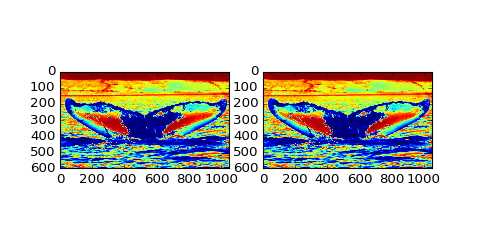

<IPython.core.display.Javascript object>


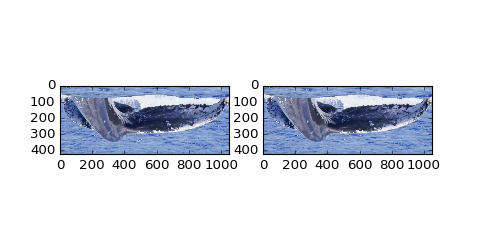

<IPython.core.display.Javascript object>


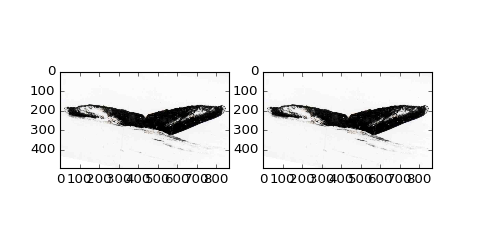

<IPython.core.display.Javascript object>


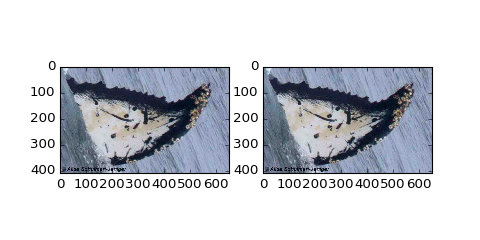

<IPython.core.display.Javascript object>


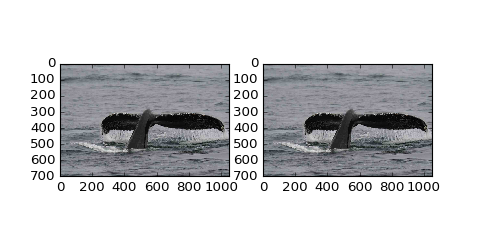

<IPython.core.display.Javascript object>


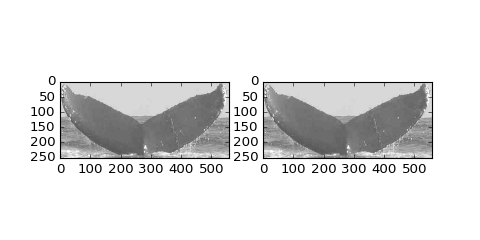

<IPython.core.display.Javascript object>


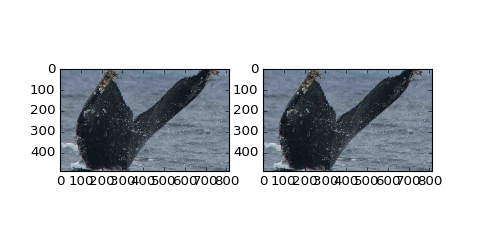

<IPython.core.display.Javascript object>


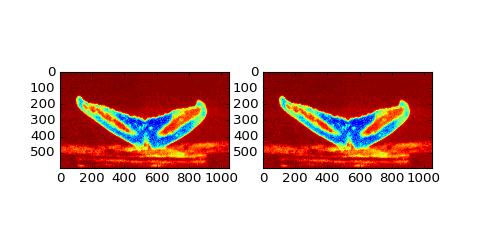

<IPython.core.display.Javascript object>


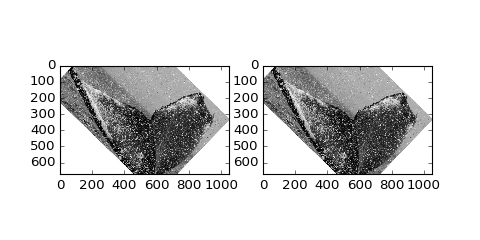

<IPython.core.display.Javascript object>


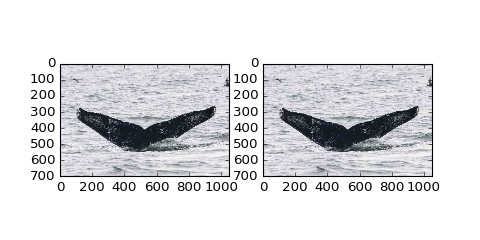

In [15]:
for h_val in duplicate_hash_val_set:
    show_duplicates(h_val)

In [16]:
print 'Length before removing any images: {:d}'.format(len(df_train))
# Remove all of the new_whales which have the same picture as a labelled whale
df_train_reduced = df_train[~(df_train.Id.apply(lambda x: x== 'new_whale') & (df_train.Copies > 1))]
print 'Length after removing duplicate new_whales: {:d}'.format(len(df_train_reduced))

# Remove all of the unclear images
df_train_reduced = df_train_reduced[~df_train_reduced.Hash_val.apply(lambda x: x in duplicate_hash_val_set)]
print 'Length after removing unclear images: {:d}'.format(len(df_train_reduced))

# For all the other images with duplicates randomly pick one of the duplicates
df_train_reduced = df_train_reduced.groupby(df_train_reduced.Hash_val, group_keys=False).apply(lambda x: x.sample(1))
print 'Length after randomly choosing a single image for the remaining duplicates: {:d}'.format(len(df_train_reduced))

Length before removing any images: 9850
Length after removing duplicate new_whales: 9674
Length after removing unclear images: 9654
Length after randomly choosing a single image for the remaining duplicates: 9061


In [17]:
# Double check that there are indeed no duplicates left
(df_train_reduced.Hash_val.value_counts()>1).sum()

0

In [22]:
# How many different categories remain after removing the duplicates and unclear whales
print 'The reduced data comprises {:d} categories, while the original data comprised {:d} categorise'.\
format(len(df_train_reduced.Id.unique()), len(df_train.Id.unique()))

The reduced data comprises 4246 categories, while the original data comprised 4251 categorise


In [65]:
# Save the reduced dataframe
df_train_reduced.to_csv('./data/train_no_duplicates.csv')